In [1]:
import pandas as pd

df_jugadores = pd.read_csv('./csv/jugadores_cebollitas.csv')
print(df_jugadores.columns)

Index(['jugador_id', 'nombre', 'posición', 'edad', 'partidos_jugados', 'goles',
       'asistencias', 'pases_completados (%)', 'tiros_al_arco',
       'precisión_tiros (%)', 'minutos_jugados'],
      dtype='object')


In [4]:
x = df_jugadores[['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']]

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df_jugadores['cluster'] = kmeans.fit_predict(x)
print(df_jugadores)

    jugador_id               nombre       posición  edad  partidos_jugados  \
0            1         Tara Alvarez        Portero    18                25   
1            2        Carol Mcclain  Mediocampista    32                12   
2            3        Robert Martin        Defensa    26                12   
3            4    Mr. Robert Turner        Defensa    25                17   
4            5  Christopher Kennedy        Defensa    35                23   
5            6  Dr. Justin Anderson  Mediocampista    33                16   
6            7      Sandra Shepherd        Portero    35                23   
7            8          Mark Bowers  Mediocampista    28                14   
8            9         Kenneth Cook        Portero    25                15   
9           10    Christopher Parks        Portero    26                12   
10          11   Michelle Henderson        Defensa    35                17   
11          12       Steven Wallace        Defensa    18        

In [3]:
columnas_numericas = ['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']
cluster_profiles = df_jugadores.groupby('cluster')[columnas_numericas].mean()
print(cluster_profiles)


         goles  asistencias  pases_completados (%)  tiros_al_arco
cluster                                                          
0          3.6          3.6                  80.04           44.8
1          2.6          4.9                  87.29            3.3
2          2.6          4.4                  78.34            9.0


C:\Users\LENOVO_THINCENTRE\AppData\Local\Temp\ipykernel_20392\1825483619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_jugadores, palette='Set2')


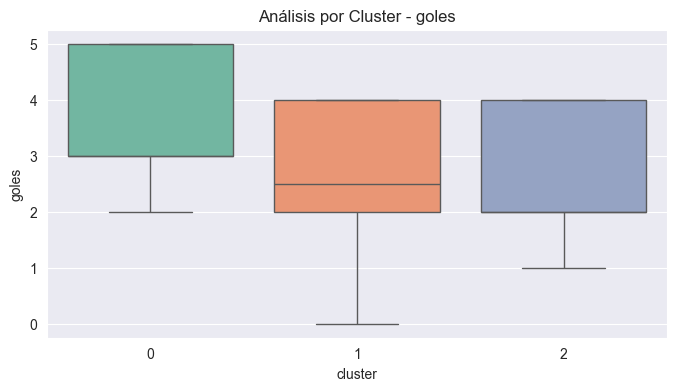

C:\Users\LENOVO_THINCENTRE\AppData\Local\Temp\ipykernel_20392\1825483619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_jugadores, palette='Set2')


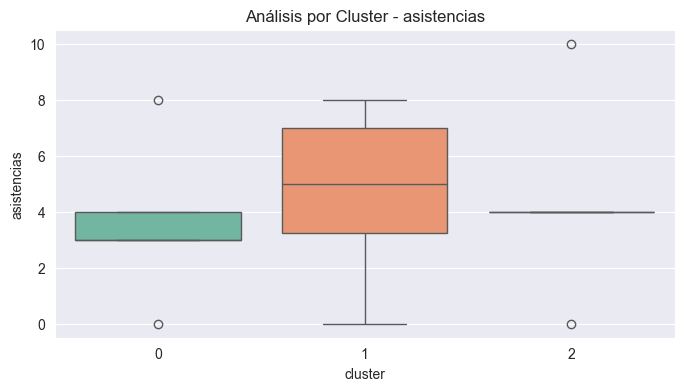

C:\Users\LENOVO_THINCENTRE\AppData\Local\Temp\ipykernel_20392\1825483619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_jugadores, palette='Set2')


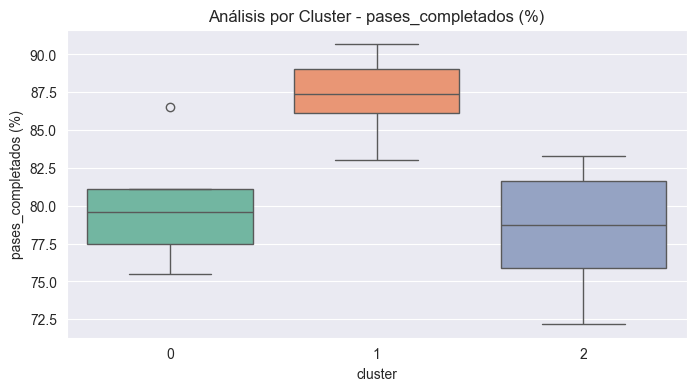

C:\Users\LENOVO_THINCENTRE\AppData\Local\Temp\ipykernel_20392\1825483619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_jugadores, palette='Set2')


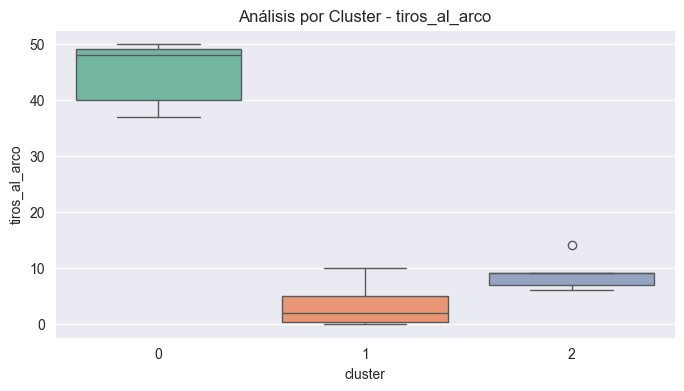

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']

for feature in features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='cluster', y=feature, data=df_jugadores, palette='Set2')
    plt.title(f'Análisis por Cluster - {feature}')
    plt.show()

In [6]:
import ipywidgets as widgets
from IPython.display import display

# dropdown interactivo
cluster_selector = widgets.Dropdown(
    options=sorted(df_jugadores['cluster'].unique()),
    description='Cluster:',
)

# función de despliegue
def mostrar_jugadores(cluster):
    jugadores = df_jugadores[df_jugadores['cluster'] == cluster]
    display(jugadores[['nombre', 'goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']])

widgets.interactive(mostrar_jugadores, cluster=cluster_selector)

interactive(children=(Dropdown(description='Cluster:', options=(np.int32(0), np.int32(1), np.int32(2)), value=…